In [1]:
import scvelo as scv
import scanpy as sc
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
#from sklearn.metrics import explained_variance_score, mean_absolute_error
import sklearn.metrics



In [2]:
# Alternatively:
#data = pd.read_pickle("data100.pkl")
#meta = pd.read_pickle('metadata100.pkl')

data = pd.read_pickle("data1000.pkl")
meta = pd.read_pickle('metadata1000.pkl')

In [3]:
##### I should do some filtering... Originally: 13960 cells 8009 genes

# Load dataset, with velocity values
    # these values are all normalized by scvelo
vdata = sc.read_h5ad("velocity_adata.h5ad")


In [4]:
# Scale Ms and velocity layer, with mean=0 and unit variance 
    # sc.pp.scale adds mean and std to var, although this relfects only last scaling
    # here we add the velocity scaling to the spliced counts scaling

sc.pp.scale(vdata, layer='Ms')
sc.pp.scale(vdata, layer='velocity')



In [5]:
##### Velocity genes
# No Ccl5 included, might be nice to check..

velocity_genes = vdata.var.index[vdata.var['velocity_genes'] == True].tolist()

In [58]:
# mean RMSE
np.sqrt(meta['mean squared error'].values).mean()


0.2902935426789245

In [54]:
# mean RMSE of the training data
np.sqrt(meta['mse training'].values).mean()

0.23837925169000895

In [25]:
meta['mean abs error'].mean()

0.2231367197185755

In [60]:
meta['mean_residuals'].var()

1.5343758862671953e-05

Coefficient analysis of one single regression. 

In [36]:
# shuffle data each regression
test, train = train_test_split(vdata, test_size=0.5)

X_train = train[:, velocity_genes].layers['velocity']
y_train = train[:, "Klf2"].layers['Ms']

X_test = test[:, velocity_genes].layers['velocity']
y_test = test[:, "Klf2"].layers['Ms']
        


In [37]:
#regression
lin = LinearRegression()
lin.fit(X_train, y_train)
params = np.append(lin.intercept_,lin.coef_)
y_pred = lin.predict(X_test)

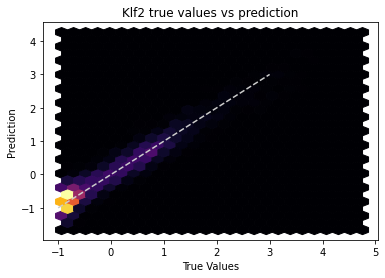

In [38]:
# plot true values vs predicted
#min_y = min(y_test)
#max_y = max(y_test)

min_y = -1
max_y = 3

plt.figure()
plt.hexbin(y_test, y_pred, gridsize=25, cmap='inferno')
plt.plot([min_y, max_y], [min_y, max_y], ls="--", c=".8")

# plot labels
plt.title(str("Klf2")+' true values vs prediction')
plt.xlabel('True Values')
plt.ylabel('Prediction')
plt.show()

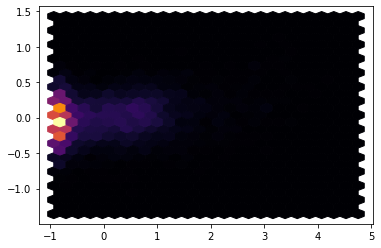

In [39]:
plt.hexbin(y_test, (y_test-y_pred).toarray(), gridsize=25, cmap='inferno')

this represents the middle 50%


[-0.18687650561332703, 0.18113940954208374]

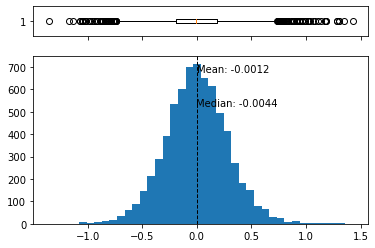

In [41]:
residuals = (y_test-y_pred).toarray()


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 

ax_hist.hist(residuals, bins=40)
box = ax_box.boxplot(residuals, vert=0)


plt.axvline(residuals.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(residuals.mean()*1.2, max_ylim*0.9, 'Mean: {:.4f}'.format(residuals.mean()))
plt.text(np.median(residuals)*1.2, max_ylim*0.7, 'Median: {:.4f}'.format(np.median(residuals)))

print("this represents the middle 50%")
[item.get_xdata()[0] for item in box['whiskers']]



In [42]:
dataL, metaL = lasso_regression_shuffle(10, 1, velocity_genes, 'Klf2', vdata, 'Ldata')



Run  0


In [67]:
metaL

,r2scores,intercepts,mse,mse training,mean abs error,max error,mean residuals,median residuals
0,-2.101034e-04,[-0.007380003],1.037121,0.962842,0.817734,4.628095,0.014760,-0.391166
1,-3.115264e-05,[-0.0027867288],0.996083,1.003786,0.809375,4.623502,0.005573,-0.394990
2,-1.438026e-07,[0.00019064684],0.993678,1.006176,0.802092,4.490310,-0.000381,-0.383452
3,-1.180353e-04,[-0.005461273],1.010291,0.989622,0.811214,4.762607,0.010923,-0.381495
4,-8.978839e-06,[0.0014898541],0.989892,1.009966,0.807879,4.619226,-0.002980,-0.404268
5,-1.079285e-03,[0.016180284],0.971320,1.029057,0.805560,4.643618,-0.032361,-0.423937
6,-1.867186e-04,[-0.0068263514],0.998818,1.001130,0.808133,4.763972,0.013653,-0.365274
7,-5.601127e-06,[-0.0011751864],0.987476,1.012380,0.807098,4.621891,0.002350,-0.385823
8,-2.839964e-07,[0.00028219595],1.001815,0.998039,0.809511,4.620433,-0.000564,-0.391852
9,-3.727550e-04,[0.009657249],1.001330,0.998710,0.811256,4.747488,-0.019315,-0.416687


In [44]:
dataL


,Genes,Coefficients,Probabilities,Standard Errors,Regression
0,1,-0.00738,0.60139,0.01413,0.0
1,Mrpl15,0.00000,1.00000,0.01905,0.0
2,Mybl1,-0.00000,1.00000,0.01914,0.0
3,Mcm3,0.00000,1.00000,0.02187,0.0
4,Smap1,-0.00000,1.00000,0.01801,0.0
...,...,...,...,...,...
1105,Kif4,-0.00000,1.00000,0.02252,9.0
1106,Cenpi,-0.00000,1.00000,0.02279,9.0
1107,Smc1a,-0.00000,1.00000,0.02025,9.0
1108,Gpm6b,-0.00000,1.00000,0.01864,9.0


In [45]:
# So, ridge regression has super similar values to linear regression, testing out different alphas
# Lasso regression on the other hand is just wierd. 


dataR, metaR = ridge_regression_shuffle(10, 1, velocity_genes, 'Klf2', vdata, 'dataR10')



Run  0


In [46]:
dataR

,Genes,Coefficients,Probabilities,Standard Errors,Regression
0,1,0.003190,0.43569,0.00409,0.0
1,Mrpl15,0.003927,0.48551,0.00563,0.0
2,Mybl1,0.008224,0.15278,0.00575,0.0
3,Mcm3,0.006356,0.31841,0.00637,0.0
4,Smap1,-0.001921,0.71393,0.00524,0.0
...,...,...,...,...,...
1105,Kif4,0.010460,0.10609,0.00647,9.0
1106,Cenpi,-0.001458,0.82346,0.00654,9.0
1107,Smc1a,0.000447,0.93959,0.00589,9.0
1108,Gpm6b,-0.015324,0.00339,0.00523,9.0


In [47]:
metaR

,r2scores,intercepts,mse,mse training,mean abs error,max error,mean residuals,median residuals
0,0.910884,[0.003190362],0.088085,0.055453,0.227595,1.741416,-0.006381,-0.009578
1,0.915032,[0.005502118],0.084578,0.057362,0.222576,1.559166,-0.011004,-0.011674
2,0.914256,[-0.0016548368],0.087198,0.055281,0.226493,1.836407,0.003310,-0.006023
3,0.913579,[0.005106342],0.085409,0.056372,0.225442,1.447505,-0.010213,-0.010982
4,0.918950,[-0.00265666],0.083773,0.056892,0.221970,1.569722,0.005313,0.000903
5,0.916826,[0.0041387863],0.084436,0.056766,0.222122,1.503599,-0.008278,-0.010778
6,0.913329,[-0.0013970789],0.083424,0.057760,0.223426,1.506694,0.002794,0.000499
7,0.918196,[-0.0016458912],0.082362,0.058588,0.221382,1.550856,0.003292,0.004855
8,0.914458,[-0.00017272716],0.083924,0.057798,0.223671,1.428885,0.000345,-0.006006
9,0.914653,[-0.0054870266],0.082610,0.057323,0.221992,1.533395,0.010974,0.005479


In [68]:
alphas = [0, 0.001, 0.01, 0.1 ,0.3, 3]

rmse = []
rmset = []
r2 = []

for x in alphas:

    dataR, metaR = ridge_regression_shuffle(2, x, velocity_genes, 'Klf2', vdata, 'dataR10')
    
    rmse += [np.sqrt(metaR['mse'].values).mean()]
    rmset += [np.sqrt(metaR['mse training'].values).mean()]
    r2 += [metaR['r2scores'].values.mean()]
    
rmseR = rmse
rmsetR = rmset
r2R = r2

Run  0
Run  0
Run  0
Run  0
Run  0
Run  0


RMSE  [0.2928749439821537, 0.2917365352206749, 0.2915346721193217, 0.2908275893395726, 0.29054159769041177, 0.2906474409406702]
training RMSE [0.23666472654910226, 0.2373089295574187, 0.23692275060308615, 0.23914528241055227, 0.23872695177794398, 0.23691078729102655]
R2 score [0.914980686794095, 0.9155473576655639, 0.9159528652317719, 0.9137297839993823, 0.9150739998010509, 0.9164420543284038]


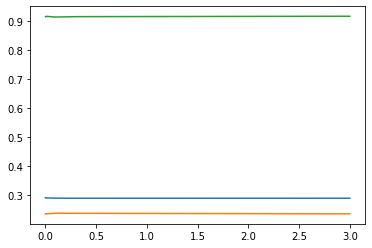

In [69]:
plt.plot(alphas, rmseR) #blau
plt.plot(alphas, rmsetR) #orange
plt.plot(alphas, r2R) #grün

print('RMSE ', rmseR)
print('training RMSE', rmsetR)
print('R2 score', r2R)


In [58]:
print('Simple Linear regression')
print('RMSE ', np.sqrt(meta['mse'].values).mean())
print('training RMSE', np.sqrt(meta['mse training'].values).mean())
print('R2 score', meta['r2scores'].values.mean())



Simple Linear regression
RMSE  0.29059625886087576
training RMSE 0.23852195820441682
R2 score 0.915529729016961


In [103]:
metaR


,r2scores,intercepts,mse,mse training,mean abs error,max error,mean residuals,median residuals
0,0.911140,[0.0045203282],0.087948,0.055017,0.228054,1.817931,-0.009041,-0.012383
1,0.913946,[-0.00053613447],0.086641,0.055693,0.224368,1.770143,0.001072,-0.002032


In [59]:
alphas = [0, 0.1 ,0.3, 0.5, 0.9, 1, 1.5, 2]

rmse = []
rmset = []
r2 = []

for x in alphas:

    dataR, metaR = lasso_regression_shuffle(2, x, velocity_genes, 'Klf2', vdata, 'dataR10')
    
    rmse += [np.sqrt(metaR['mse'].values).mean()]
    rmset += [np.sqrt(metaR['mse training'].values).mean()]
    r2 += [metaR['r2scores'].values.mean()]

rmseL = rmse
rmsetL = rmset
r2L = r2

Run  0
Run  0
Run  0
Run  0
Run  0
Run  0
Run  0
Run  0


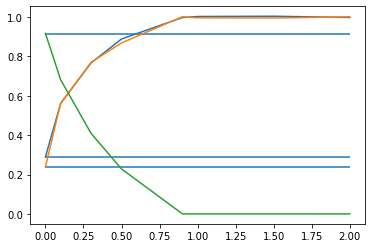

In [60]:
plt.plot(alphas, rmseL)
plt.plot(alphas, rmsetL)
plt.plot(alphas, r2L)
plt.hlines(np.sqrt(meta['mse'].values).mean(), 0,2)
plt.hlines(np.sqrt(meta['mse training'].values).mean(), 0,2)
plt.hlines(meta['r2scores'].values.mean(), 0,2)

In [6]:
data

,Genes,Coefficients,Probabilities,Standard Errors,Regression
0,1,-0.004562,0.26379,0.00408,0.0
1,Mrpl15,0.007677,0.16463,0.00552,0.0
2,Mybl1,0.014457,0.01211,0.00576,0.0
3,Mcm3,0.001811,0.77791,0.00642,0.0
4,Smap1,-0.006039,0.25295,0.00528,0.0
...,...,...,...,...,...
1105,Kif4,0.004092,0.52715,0.00647,999.0
1106,Cenpi,-0.010962,0.10620,0.00678,999.0
1107,Smc1a,0.005165,0.38176,0.00590,999.0
1108,Gpm6b,-0.015306,0.00293,0.00514,999.0


In [11]:
meta

,r2scores,intercepts,mean squared error,explained variance score,mean abs error,median absolute error,max error,mean_residuals,median_residuals
0,0.913699,[-0.0045620836],0.087117,0.913781,0.225765,0.177916,1.449041,0.009124,0.003190
1,0.916301,[-0.0016828706],0.083774,0.916312,0.221842,0.179215,1.497972,0.003366,-0.002329
2,0.917348,[0.0021631047],0.081501,0.917367,0.219599,0.175603,1.589403,-0.004326,-0.009581
3,0.914471,[7.6182187e-06],0.084699,0.914471,0.222264,0.174098,1.506939,-0.000015,-0.004505
4,0.914571,[-0.003090301],0.085812,0.914610,0.224981,0.179325,1.639338,0.006180,0.007005
...,...,...,...,...,...,...,...,...,...
995,0.916288,[-0.0035133623],0.084268,0.916337,0.222473,0.179304,1.717907,0.007027,-0.000755
996,0.915288,[0.0011807336],0.085240,0.915294,0.223282,0.174493,1.736939,-0.002362,-0.007722
997,0.918638,[-0.001938418],0.082208,0.918653,0.221087,0.179343,1.518940,0.003877,-0.001036
998,0.918492,[-0.0022073667],0.082236,0.918511,0.220539,0.177681,1.577355,0.004415,-0.000390


In [15]:
data.groupby("Genes").Coefficients.describe()

,count,mean,std,min,25%,50%,75%,max
Genes,,,,,,,,
1,1000.0,-0.000017,0.002532,-0.007569,-0.001670,0.000016,0.001671,0.009272
1110004E09Rik,1000.0,-0.001312,0.003100,-0.010737,-0.003358,-0.001295,0.000765,0.009225
1500009L16Rik,1000.0,-0.003805,0.003749,-0.015235,-0.006405,-0.003734,-0.001262,0.007348
1600014C10Rik,1000.0,0.002274,0.003379,-0.010365,-0.000037,0.002334,0.004591,0.012524
1700017B05Rik,1000.0,-0.007991,0.003501,-0.020186,-0.010457,-0.007779,-0.005690,0.002042
...,...,...,...,...,...,...,...,...
Zeb2,1000.0,0.018433,0.004674,0.004988,0.015208,0.018361,0.021594,0.034898
Zfp36l1,1000.0,0.010883,0.003460,-0.001643,0.008574,0.010779,0.013190,0.021513
Zfp831,1000.0,-0.003181,0.003979,-0.016205,-0.005848,-0.003135,-0.000467,0.012743


In [28]:
data['coef mean'] = data.groupby('Genes').Coefficients.transform('mean')
data['coef std'] = data.groupby('Genes').Coefficients.transform('std')

In [14]:
# this is not the real thing. this is just 1/ß
#data['coef variability'] = data.apply(lambda x: x['coef std']/x['coef var'], axis=1)

In [33]:
# Here significanz wert definieren! 0.001

data['bellow']= data.apply(lambda x: (1 if x['Probabilities']<=0.001 else 0), axis=1)
data['count'] = data.groupby('Genes').bellow.transform('sum')

In [34]:
data

,Genes,Coefficients,Probabilities,Standard Errors,Regression,coefvar,cf,coef mean,coef std,count,bellow
0,1,-0.001350,0.73662,0.00401,0.0,-2.970370,-0.270471,-0.000056,0.002462,0,0
1,Mrpl15,0.005935,0.28274,0.00552,0.0,0.930076,1.308821,0.005549,0.003297,0,0
2,Mybl1,0.015636,0.00429,0.00547,0.0,0.349834,0.958042,0.010633,0.003435,15,0
3,Mcm3,0.000531,0.93278,0.00629,0.0,11.845574,-0.341336,-0.000724,0.003632,0,0
4,Smap1,-0.003784,0.46171,0.00514,0.0,-1.358351,-8.661783,-0.001397,0.003566,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1105,Kif4,0.010353,0.11074,0.00649,999.0,0.626871,0.705948,0.008209,0.003860,0,0
1106,Cenpi,-0.007083,0.28884,0.00668,999.0,-0.943103,4.230034,-0.004017,0.003916,0,0
1107,Smc1a,-0.004600,0.43683,0.00592,999.0,-1.286956,0.817769,-0.001314,0.003835,0,0
1108,Gpm6b,-0.008105,0.14162,0.00551,999.0,-0.679827,-0.494121,-0.012119,0.003557,62,0


(array([  5.,  16.,  49., 134., 192., 243., 197., 120.,  34.,  10.]),
 array([0.90983054, 0.91088591, 0.91194129, 0.91299666, 0.91405203,
        0.91510741, 0.91616278, 0.91721816, 0.91827353, 0.91932891,
        0.92038428]),
 <BarContainer object of 10 artists>)

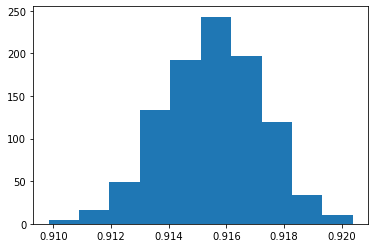

In [27]:
##### Plot histogram of r2scores
plt.hist(meta['r2scores'])

These are the 10 genes with highest mean values: 
         Genes  coef mean  count
554    Rasgrp2  -0.199861   1000
249     Nfkbia   0.063747   1000
699     S100a6  -0.056358    986
46        Atf3   0.054235   1000
1007  Arhgef18   0.052637   1000
952     Pycard  -0.051406   1000
1003    Slc7a5   0.047335   1000
208       Gas7   0.044798   1000
459     Baiap3  -0.044470   1000
167   Rap1gap2   0.038396   1000

These are the 25 most frequent genes: 
         Genes  coef mean  count
1007  Arhgef18   0.052637   1000
46        Atf3   0.054235   1000
167   Rap1gap2   0.038396   1000
208       Gas7   0.044798   1000
412      Klhl6   0.030692   1000
678      Cd160   0.033457   1000
554    Rasgrp2  -0.199861   1000
459     Baiap3  -0.044470   1000
1095      PISD  -0.032012   1000
1003    Slc7a5   0.047335   1000
249     Nfkbia   0.063747   1000
75        Sell  -0.034452   1000
952     Pycard  -0.051406   1000
76     Gm10522   0.033981   1000
584      Traf1   0.030080    999
154      Dock2   0.

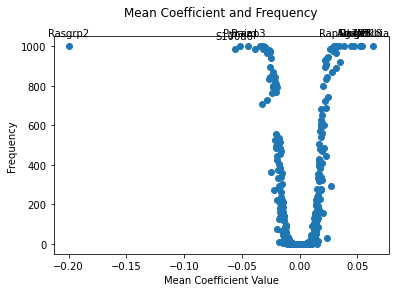

In [35]:
##### Plot mean coefficients against frequency 

# dataframe of significant genes with mean and count
filtered = data[~data.index.duplicated()]

# plot points
plt.scatter(filtered['coef mean'], filtered['count'])

# plot labels
plt.title('Mean Coefficient and Frequency', pad=20)
plt.xlabel('Mean Coefficient Value')
plt.ylabel('Frequency')

# zip joins x and y coordinates in pairs
l = filtered.reindex(filtered['coef mean'].abs().sort_values(ascending=False).index)[:10].copy()


for x,y,g in zip(l['coef mean'], l['count'], l['Genes']):

    label = g

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

print('These are the 10 genes with highest mean values: ')
print(l[['Genes', 'coef mean', 'count']])
print()
print('These are the 25 most frequent genes: ')
print(filtered[['Genes','coef mean','count']].sort_values(by='count', ascending=False)[:25])




These are the 10 genes with highest coefficients: 
         Genes  coef mean  coef variability
554    Rasgrp2  -0.200427        150.794607
249     Nfkbia   0.063540        185.645531
699     S100a6  -0.056130        129.017619
46        Atf3   0.053957        207.037826
1007  Arhgef18   0.052435        226.141546
952     Pycard  -0.051572        180.884639
1003    Slc7a5   0.047588        222.284468
208       Gas7   0.044627        243.301853
459     Baiap3  -0.044626        244.868890
167   Rap1gap2   0.038529        186.773564

These are the 10 least variable genes: 
        Genes  coef mean  coef variability
699    S100a6  -0.056130        129.017619
538    Malat1  -0.000870        129.197610
470  Hsp90ab1   0.022919        149.469646
554   Rasgrp2  -0.200427        150.794607
926     Fxyd5  -0.032686        159.890897
140    Nap1l1  -0.018255        167.355816
530    Gramd3   0.034951        169.314402
904    Serbp1  -0.000651        170.093165
343    Diaph3  -0.004500        170.5

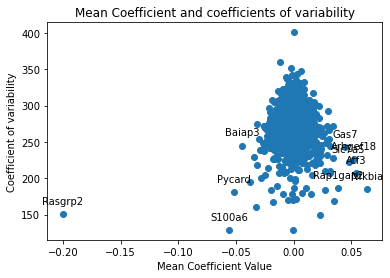

In [17]:
##### Plot mean coefficients against the coefficients of variability 

# dataframe of significant genes with mean and count
filtered = data[~data.index.duplicated()]

# plot points
# might have to catch NaN. That might not be plottable
plt.scatter(filtered['coef mean'], filtered['coef variability'])

# plot labels
plt.title('Mean Coefficient and coefficients of variability')
plt.xlabel('Mean Coefficient Value')
plt.ylabel('Coefficient of variability')

# zip joins x and y coordinates in pairs
l = filtered.reindex(filtered['coef mean'].abs().sort_values(ascending=False).index)[:10].copy()


for x,y,g in zip(l['coef mean'], l['coef variability'], l['Genes']):

    label = g

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

print('These are the 10 genes with highest coefficients: ')
print(l[['Genes', 'coef mean', 'coef variability']])
print()
print('These are the 10 least variable genes: ')
print(filtered[['Genes','coef mean','coef variability']].sort_values(by='coef variability')[:10])

In [41]:
# also 66 gene werden 100 mal vertreten. 
data['count'].apply(lambda x: 1 if x==100 else 0).sum()

2100

Trying to get the coefficient of variation.
I am having trouble here, because I am not sure at what level I should compare this. 

In [20]:
data['coef variation'] = data.apply(lambda x: x['coef std']/x['coef mean'], axis=1)

(array([1.000e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+03,
        6.000e+03, 1.082e+06, 1.700e+04, 1.000e+03, 0.000e+00, 1.000e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+03]),
 array([-148.33370361, -128.84525639, -109.35680918,  -89.86836196,
         -70.37991475,  -50.89146753,  -31.40302032,  -11.9145731 ,
           7.57387411,   27.06232133,   46.55076854,   66.03921576,
          85.52766297,  105.01611019,  124.5045574 ,  143.99300462,
         163.48145183,  182.96989905,  202.45834626,  221.94679348,
         241.43524069,  260.92368791,  280.41213512,  299.90058234,
         319.38902955,  338.87747677,  358.36592398,  377.8543712 ,
         397.34281841,  416.83126563,  436.31971284]),
 <BarContainer object of 30 artists>)

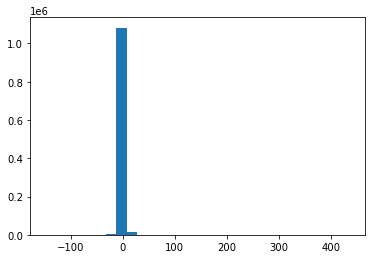

In [8]:
# mean / std 
plt.hist(data['coef variation'], bins = 30)

In [26]:
zeros = data[data['Coefficients']==0]['Genes']
zeros.values
#data.apply(lambda x: x[Coefficients], axis=1)

array(['Lars', 'Pelp1', 'Mettl1', '2810417H13Rik', 'C330027C09Rik',
       'Nudc', 'Troap', 'Ska3', 'Ggt1', 'Rbmxl1', 'Hsd17b12', 'Eef1e1',
       'Nolc1', 'Dhx58', 'Mbnl3', 'Wdr36', 'Ifih1', 'Sp100', 'Foxo3',
       'Ncapg2', 'Tnfrsf4', 'Rbbp8', 'Psmd7', 'Supt16', 'Rnf165',
       'Pglyrp2', 'Epdr1', 'Trim27', '1110004E09Rik', 'Fam134b', 'Foxo3'],
      dtype=object)

In [18]:
# The ones that have a coefficient with value 0 have not been removed. These are 30 genes
# mean coefficient of variance; 30 gene haben 0, die müssen rausgenommen werden eigentlich.. 
# auch ohne die gene mit 0, sind die werte anders... 
data['coefvar'] = data.apply(lambda x: None if x['Coefficients']==0 else x['Standard Errors']/x['Coefficients'], axis=1)
data['cf'] = data.groupby('Genes').coefvar.transform('mean')



(array([1.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 9.000000e+00, 1.400000e+01,
        1.000000e+00, 1.000000e+00, 2.000000e+00, 2.000000e+01,
        1.500000e+01, 3.600000e+01, 1.180000e+02, 6.300000e+02,
        1.108331e+06, 5.060000e+02, 1.080000e+02, 5.400000e+01,
        2.200000e+01, 2.300000e+01, 3.000000e+00, 0.000000e+00,
        9.000000e+00, 3.100000e+01, 9.000000e+00, 5.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([-9810.00002477, -9214.3333566 , -8618.66668843, -8023.00002026,
        -7427.33335209, -6831.66668391, -6236.00001574, -5640.33334757,
        -5044.6666794 , -4449.00001123, -3853.33334306, -3257.66667489,
        -2662.00000672, -2066.33333855, -1470.66667038,  -875.00000221,
         -279.33333404,   316.33333413,   912.0000023 ,  1507.66667047,
         2103.33333864,  2699.00000681,  3294.66667498,  3890.33334316,
         4486.00001133,  5081.6666795 ,  5677.33334767,  6273.00001584,
         6

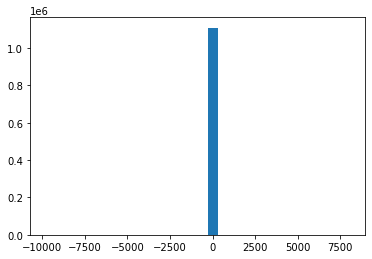

In [19]:
# mean / std 
plt.hist(data['coefvar'], bins = 30)

(array([  1.,   2.,   0.,   1.,   2.,   4.,   3.,   7.,   8.,  15.,  26.,
         49., 123., 280., 279., 152.,  56.,  31.,  27.,  13.,  11.,   6.,
          5.,   3.,   3.,   0.,   0.,   2.,   0.,   1.]),
 array([-11.46304758, -10.64570573,  -9.82836387,  -9.01102202,
         -8.19368017,  -7.37633832,  -6.55899647,  -5.74165462,
         -4.92431277,  -4.10697092,  -3.28962907,  -2.47228721,
         -1.65494536,  -0.83760351,  -0.02026166,   0.79708019,
          1.61442204,   2.43176389,   3.24910574,   4.06644759,
          4.88378945,   5.7011313 ,   6.51847315,   7.335815  ,
          8.15315685,   8.9704987 ,   9.78784055,  10.6051824 ,
         11.42252425,  12.23986611,  13.05720796]),
 <BarContainer object of 30 artists>)

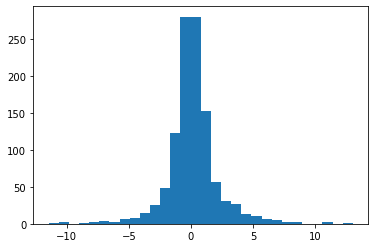

In [25]:
# standard errors / coefficients  
plt.hist(data[~data.index.duplicated()]['cf'], bins = 30)

Functions, to be added to .py

In [6]:
##### Generate LINEAR Regression Data


def linear_regression_shuffle(runs:int, genes, tf:str, vdata, filename:str):
    # Returns dataframe including p-values, coefficients, and r^2 score of the number of regression runs specified. 
        #The number of genes should be less than 5000, else there are no good p-values. In each regression run training and test data is reshuffled"""
    
    
    
    # store data accross all regressions
    frames = []
    r2scores = []
    intercepts = []
    mse = []
    mae = []
    medae = []
    maxe = []
    explainedvariancescore = []
    mean_residuals = []
    median_residuals = []
    tmse = []
    
    # Run regressions
    for x in range(runs):
        
        # shuffle data each regression
        test, train = train_test_split(vdata, test_size=0.5)
    
        X_train = train[:, genes].layers['velocity']
        y_train = train[:, tf].layers['Ms']

        X_test = test[:, genes].layers['velocity']
        y_test = test[:, tf].layers['Ms']

        
        if x%50==0:
            print('Run ', x)
        
        
        
        #regression
        lin = LinearRegression()
        lin.fit(X_train, y_train)
        params = np.append(lin.intercept_,lin.coef_)
        y_pred = lin.predict(X_test)
        y_train_pred = lin.predict(X_train)
        #print(sklearn.metrics.mean_squared_error(y_test, y_pred))

        # save values of current regression
        r2scores += [sklearn.metrics.r2_score(y_test, y_pred)]
        mse += [sklearn.metrics.mean_squared_error(y_test,y_pred)]
        tmse += [sklearn.metrics.mean_squared_error(y_train, y_train_pred)]
        mae += [sklearn.metrics.mean_absolute_error(y_test, y_pred)]
        medae += [sklearn.metrics.median_absolute_error(y_test, y_pred)]
        maxe +=[sklearn.metrics.max_error(y_test, y_pred)]
        mean_residuals +=[(y_test - y_pred).toarray().mean()]
        median_residuals +=[np.median((y_test - y_pred).toarray())]
        intercepts += [lin.intercept_]
        
        explainedvariancescore += [sklearn.metrics.explained_variance_score(y_test, y_pred)]
        delta_y = y_test - y_pred


        print('yshape', y_pred.shape)
        print('x shape', X_test.shape)
        
        # Here we append, why though? appending (6847, 1) and (6847, 6000) on axis= 1, then we get (6847, 6001). Is this necessary? 
        # We are adding one column of 1 infront of everything? Why?
        # P-values: based on https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
        newX = np.append(np.ones((len(X_test),1)), X_test, axis=1)
        MSE = (sum((delta_y**2)))/(len(newX)-len(newX[0]))

        var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
        sd_b = np.sqrt(var_b)
        ts_b = params/ sd_b

        p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

        sd_b = np.round(sd_b,5)
        ts_b = np.round(ts_b,5)
        p_values = np.round(p_values,5)
        params = np.round(params,6)

        # I am not sure if this is right. Why do we need a column of 1s?
        names = ['1'] + genes
        regression = list(np.ones(len(params),)*x)

        
        df = pd.DataFrame()
        df['Genes'], df["Coefficients"], df["Probabilities"], df["Standard Errors"], df["Regression"]= [names, params, p_values, sd_b, regression]
        frames+=[df]



      
    data = pd.concat(frames)
    
    metadata = pd.DataFrame()
    metadata["r2scores"], metadata["intercepts"], metadata["mse"], metadata['mse training'], metadata["mean abs error"], metadata["max error"], metadata['mean residuals'], metadata['median residuals']  = [r2scores, intercepts, mse, tmse, mae, maxe, mean_residuals, median_residuals]
    
    data.to_pickle(filename+'.pkl')
    metadata.to_pickle('meta'+filename+'.pkl')    

    return data, metadata

In [7]:
##### Generate LASSO Regression Data


def lasso_regression_shuffle(runs:int, alpha:int, genes, tf:str, vdata, filename:str):
    # Returns dataframe including p-values, coefficients, and r^2 score of the number of regression runs specified. 
        #The number of genes should be less than 5000, else there are no good p-values. In each regression run training and test data is reshuffled"""
    
    
    
    # store data accross all regressions
    frames = []
    r2scores = []
    intercepts = []
    mse = []
    mae = []
    medae = []
    maxe = []
    explainedvariancescore = []
    mean_residuals = []
    median_residuals = []
    tmse = []
    
    # Run regressions
    for x in range(runs):
        
        # shuffle data each regression
        test, train = train_test_split(vdata, test_size=0.5)
    
        X_train = train[:, genes].layers['velocity']
        y_train = train[:, tf].layers['Ms']

        X_test = test[:, genes].layers['velocity']
        y_test = test[:, tf].layers['Ms']

        
        if x%50==0:
            print('Run ', x)
        
        #regression
        lin = Lasso(alpha=alpha)
        lin.fit(X_train, y_train)
        params = np.append(lin.intercept_,lin.coef_)
        y_pred = lin.predict(X_test)
        y_train_pred = lin.predict(X_train)
        #print(sklearn.metrics.mean_squared_error(y_test, y_pred))

        # save values of current regression
        r2scores += [sklearn.metrics.r2_score(y_test, y_pred)]
        mse += [sklearn.metrics.mean_squared_error(y_test,y_pred)]
        tmse += [sklearn.metrics.mean_squared_error(y_train, y_train_pred)]
        mae += [sklearn.metrics.mean_absolute_error(y_test, y_pred)]
        medae += [sklearn.metrics.median_absolute_error(y_test, y_pred)]
        maxe +=[sklearn.metrics.max_error(y_test, y_pred)]
        mean_residuals +=[(y_test - y_pred).toarray().mean()]
        median_residuals +=[np.median((y_test - y_pred).toarray())]
        intercepts += [lin.intercept_]
        
        explainedvariancescore += [sklearn.metrics.explained_variance_score(y_test, y_pred)]
        delta_y = y_test - y_pred.reshape(-1,1)

        
        # Here we append, why though? appending (6847, 1) and (6847, 6000) on axis= 1, then we get (6847, 6001). Is this necessary? 
        # We are adding one column of 1 infront of everything? Why?
        # P-values: based on https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
        newX = np.append(np.ones((len(X_test),1)), X_test, axis=1)
        MSE = (sum((delta_y)**2))/(len(newX)-len(newX[0]))

        var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
        sd_b = np.sqrt(var_b)
        ts_b = params/ sd_b

        p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

        sd_b = np.round(sd_b,5)
        ts_b = np.round(ts_b,5)
        p_values = np.round(p_values,5)
        params = np.round(params,6)

        # I am not sure if this is right. Why do we need a column of 1s?
        names = ['1'] + genes
        regression = list(np.ones(len(params),)*x)

        
        df = pd.DataFrame()
        df['Genes'], df["Coefficients"], df["Probabilities"], df["Standard Errors"], df["Regression"]= [names, params, p_values, sd_b, regression]
        frames+=[df]



      
    data = pd.concat(frames)
    
    metadata = pd.DataFrame()
    metadata["r2scores"], metadata["intercepts"], metadata["mse"], metadata['mse training'], metadata["mean abs error"], metadata["max error"], metadata['mean residuals'], metadata['median residuals']  = [r2scores, intercepts, mse, tmse, mae, maxe, mean_residuals, median_residuals]
    
    data.to_pickle(filename+'.pkl')
    metadata.to_pickle('meta'+filename+'.pkl')    

    return data, metadata

In [8]:
##### Generate RIDGE Regression Data


def ridge_regression_shuffle(runs:int, alpha:int, genes, tf:str, vdata, filename:str):
    # Returns dataframe including p-values, coefficients, and r^2 score of the number of regression runs specified. 
        #The number of genes should be less than 5000, else there are no good p-values. In each regression run training and test data is reshuffled"""
    
    
    
    # store data accross all regressions
    frames = []
    r2scores = []
    intercepts = []
    mse = []
    mae = []
    medae = []
    maxe = []
    explainedvariancescore = []
    mean_residuals = []
    median_residuals = []
    tmse = []
    
    # Run regressions
    for x in range(runs):
        
        # shuffle data each regression
        test, train = train_test_split(vdata, test_size=0.5)
    
        X_train = train[:, genes].layers['velocity']
        y_train = train[:, tf].layers['Ms']

        X_test = test[:, genes].layers['velocity']
        y_test = test[:, tf].layers['Ms']

        
        if x%50==0:
            print('Run ', x)
        
        #regression
        lin = Ridge(alpha=alpha)
        lin.fit(X_train, y_train)
        params = np.append(lin.intercept_,lin.coef_)
        y_pred = lin.predict(X_test)
        y_train_pred = lin.predict(X_train)
        #print(sklearn.metrics.mean_squared_error(y_test, y_pred))

        # save values of current regression
        r2scores += [sklearn.metrics.r2_score(y_test, y_pred)]
        mse += [sklearn.metrics.mean_squared_error(y_test,y_pred)]
        tmse += [sklearn.metrics.mean_squared_error(y_train, y_train_pred)]
        mae += [sklearn.metrics.mean_absolute_error(y_test, y_pred)]
        medae += [sklearn.metrics.median_absolute_error(y_test, y_pred)]
        maxe +=[sklearn.metrics.max_error(y_test, y_pred)]
        mean_residuals +=[(y_test - y_pred).toarray().mean()]
        median_residuals +=[np.median((y_test - y_pred).toarray())]
        intercepts += [lin.intercept_]
        
        explainedvariancescore += [sklearn.metrics.explained_variance_score(y_test, y_pred)]
        delta_y = y_test - y_pred.reshape(-1,1)

        
        # Here we append, why though? appending (6847, 1) and (6847, 6000) on axis= 1, then we get (6847, 6001). Is this necessary? 
        # We are adding one column of 1 infront of everything? Why?
        # P-values: based on https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
        newX = np.append(np.ones((len(X_test),1)), X_test, axis=1)
        MSE = (sum((delta_y)**2))/(len(newX)-len(newX[0]))

        var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
        sd_b = np.sqrt(var_b)
        ts_b = params/ sd_b

        p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

        sd_b = np.round(sd_b,5)
        ts_b = np.round(ts_b,5)
        p_values = np.round(p_values,5)
        params = np.round(params,6)

        # I am not sure if this is right. Why do we need a column of 1s?
        names = ['1'] + genes
        regression = list(np.ones(len(params),)*x)

        
        df = pd.DataFrame()
        df['Genes'], df["Coefficients"], df["Probabilities"], df["Standard Errors"], df["Regression"]= [names, params, p_values, sd_b, regression]
        frames+=[df]



      
    data = pd.concat(frames)
    
    metadata = pd.DataFrame()
    metadata["r2scores"], metadata["intercepts"], metadata["mse"], metadata['mse training'], metadata["mean abs error"], metadata["max error"], metadata['mean residuals'], metadata['median residuals']  = [r2scores, intercepts, mse, tmse, mae, maxe, mean_residuals, median_residuals]
    
    data.to_pickle(filename+'.pkl')
    metadata.to_pickle('meta'+filename+'.pkl')    

    return data, metadata